### MLP for analytes classification on PCA data using Keras
#### Edgar Acuna
#### July 2020

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
#loading the data
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)

In [3]:
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)

In [4]:
from sklearn.decomposition import PCA
dfset2=dfset1.copy()
pca = PCA(n_components=50)
pca_result = pca.fit_transform(dfset2)
dfset1['pca-one'] = pca_result[:,0]
dfset1['pca-two'] = pca_result[:,1] 
dfset1['pca-three'] = pca_result[:,2]
pca_result.shape

(18000, 50)

In [5]:
b=pd.DataFrame(pca_result)
b.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-7.167591,-1.468151,-0.873104,0.280079,-0.026923,0.154126,-0.196475,-0.074681,0.016685,0.001436,...,0.010736,0.002669,0.015142,-0.015719,-0.010643,-0.011491,-0.010950,0.000732,0.000089,0.002056
1,22.337234,-3.199556,-0.610903,-0.185739,-0.387909,-0.136990,-0.200286,-0.394372,0.212147,0.053664,...,0.102973,0.000419,-0.051839,-0.025609,0.007779,0.017732,-0.022576,0.017974,-0.008187,-0.004044
2,-3.274613,0.100711,1.996565,-0.693721,-0.118535,-0.054804,-0.105876,-0.099250,-0.017151,0.093985,...,-0.002206,-0.007794,0.004601,-0.006627,0.002766,-0.005352,0.002778,0.003041,0.005572,0.004198
3,-3.686995,0.132895,1.957354,-0.713554,-0.084030,0.035380,0.036085,-0.108315,0.054159,0.086967,...,0.004965,-0.001998,-0.004797,0.003208,-0.000610,-0.000779,0.003366,0.002871,0.005891,0.004655
4,-8.268746,-1.605050,-0.910381,0.259557,-0.052556,0.031169,0.010076,0.021967,0.028203,-0.062977,...,-0.002194,-0.013587,0.002520,0.004567,0.005434,-0.008165,0.008093,-0.000083,-0.002990,-0.003628


In [6]:
# Configuration options
feature_vector_length = 50
num_classes = 18000

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(b,y, test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

Train dimension:
(12600, 50)
Test dimension:
(5400, 50)


In [8]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.1, input_shape=input_shape))
model.add(Dense(300, input_shape=input_shape, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (50,)
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               15300     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 18000)             1818000   
Total params: 1,863,400
Trainable params: 1,863,400
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_history=model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 10080 samples, validate on 2520 samples
Epoch 1/100
10080/10080 [==============================] - 29s 3ms/step - loss: 4.3865 - accuracy: 0.0292 - val_loss: 3.7190 - val_accuracy: 0.0302
Epoch 2/100
10080/10080 [==============================] - 26s 3ms/step - loss: 3.6235 - accuracy: 0.0604 - val_loss: 3.3720 - val_accuracy: 0.1044
Epoch 3/100
10080/10080 [==============================] - 26s 3ms/step - loss: 3.0811 - accuracy: 0.1903 - val_loss: 2.5962 - val_accuracy: 0.3290
Epoch 4/100
10080/10080 [==============================] - 24s 2ms/step - loss: 2.3866 - accuracy: 0.4042 - val_loss: 1.9215 - val_accuracy: 0.5913
Epoch 5/100
10080/10080 [==============================] - 24s 2ms/step - loss: 1.8917 - accuracy: 0.5426 - val_loss: 1.4795 - val_accuracy: 0.7131
Epoch 6/100
10080/10080 [==============================] - 24s 2ms/step - loss: 1.5906 - accuracy: 0.6260 - val_loss: 1.1843 - val_accuracy: 0.7845
Epoch 7/100
100

In [10]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(test_results)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

5400/5400 [==============================] - 4s 790us/step
[0.24746465962242198, 0.9425926208496094]
Test results - Loss: 0.24746465962242198 - Accuracy: 0.9425926208496094%


### Comparing all the results with MLP
|Data | Accuracy |
| --- |  --- |
| Original* | .5753 |
| Binned* | .5812 |
| 50 PC's  | .9425 |
| 100 PC's | .9231 |
| 200 PC's | .9120 |
| 360 PC's | .9033 |
| Lower section* | .6233 |
| Middle section* | .2629 |
| Upper section* | .2468 |

(*) This result appears in another notebook

### K-nn still outperforms MLP in the multiclass problem

### 2.  Binary  Classification of  some analytes

In [7]:
labels=list(range(1,41))

### Analyte #18

In [8]:
yclass=y.copy()
yclass[yclass!=16]=0
yclass[yclass==16]=1
X_train, X_test, yclass_train, yclass_test = train_test_split(b,yclass,test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)
Y_train = to_categorical(yclass_train, num_classes)
Y_test = to_categorical(yclass_test, num_classes)

Train dimension:
(12600, 50)
Test dimension:
(5400, 50)


In [9]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.1, input_shape=input_shape))
model.add(Dense(300, input_shape=input_shape, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (50,)
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               15300     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 18000)             1818000   
Total params: 1,863,400
Trainable params: 1,863,400
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy(name="accuracy"), keras.metrics.Precision(name="precision"),keras.metrics.Recall(name="recall")])
baseline_history=model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 10080 samples, validate on 2520 samples
Epoch 1/100
10080/10080 [==============================] - 16s 2ms/step - loss: 1.1791 - accuracy: 1.0000 - precision: 0.9767 - recall: 0.8228 - val_loss: 0.1328 - val_accuracy: 1.0000 - val_precision: 0.9742 - val_recall: 0.9742
Epoch 2/100
10080/10080 [==============================] - 17s 2ms/step - loss: 0.1223 - accuracy: 1.0000 - precision: 0.9766 - recall: 0.9751 - val_loss: 0.1132 - val_accuracy: 1.0000 - val_precision: 0.9746 - val_recall: 0.9742
Epoch 3/100
10080/10080 [==============================] - 16s 2ms/step - loss: 0.0988 - accuracy: 1.0000 - precision: 0.9770 - recall: 0.9769 - val_loss: 0.1022 - val_accuracy: 1.0000 - val_precision: 0.9770 - val_recall: 0.9766
Epoch 4/100
10080/10080 [==============================] - 16s 2ms/step - loss: 0.0842 - accuracy: 1.0000 - precision: 0.9799 - recall: 0.9795 - val_loss: 0.0776 - val_accuracy: 1.0000 - val_precision: 0.9802 - va

10080/10080 [==============================] - 19s 2ms/step - loss: 0.0220 - accuracy: 1.0000 - precision: 0.9932 - recall: 0.9932 - val_loss: 0.0246 - val_accuracy: 1.0000 - val_precision: 0.9929 - val_recall: 0.9929
Epoch 71/100
10080/10080 [==============================] - 17s 2ms/step - loss: 0.0225 - accuracy: 1.0000 - precision: 0.9937 - recall: 0.9937 - val_loss: 0.0182 - val_accuracy: 1.0000 - val_precision: 0.9948 - val_recall: 0.9948
Epoch 72/100
10080/10080 [==============================] - 18s 2ms/step - loss: 0.0228 - accuracy: 1.0000 - precision: 0.9936 - recall: 0.9936 - val_loss: 0.0155 - val_accuracy: 1.0000 - val_precision: 0.9960 - val_recall: 0.9960
Epoch 73/100
10080/10080 [==============================] - 20s 2ms/step - loss: 0.0234 - accuracy: 1.0000 - precision: 0.9936 - recall: 0.9934 - val_loss: 0.0255 - val_accuracy: 1.0000 - val_precision: 0.9925 - val_recall: 0.9925
Epoch 74/100
10080/10080 [==============================] - 18s 2ms/step - loss: 0.0210 -

In [11]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}% -Precision: {test_results[2]}% -Recall: {test_results[3]}%')

5400/5400 [==============================] - 4s 670us/step
Test results - Loss: 0.021241165391272968 - Accuracy: 0.9999995231628418% -Precision: 0.9933333396911621% -Recall: 0.9933333396911621%


In [12]:
#Function for plotting
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'accuracy','precision','recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    else:
      plt.ylim([0,1])

    plt.legend()

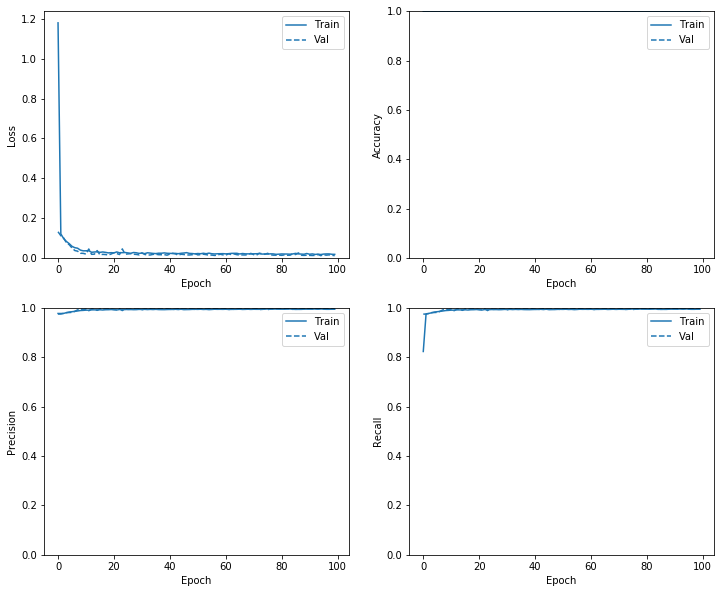

In [13]:
plot_metrics(baseline_history)

In [14]:
#Computing F1-score
train_features = np.array(X_train)
test_features = np.array(X_test)
train_labels=np.array(yclass_train)
test_labels=np.array(yclass_test)
train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
f1_train=sklearn.metrics.f1_score(train_labels, train_predictions_baseline, average=None)
test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average=None)
print('f1_scores, training set',f1_train,'f1_scores in testing set',f1_test)

f1_scores, training set [0.9980108  0.91358025] f1_scores in testing set [0.99658314 0.86363636]


In [15]:
#The ROC curve
fp, tp, _ = sklearn.metrics.roc_curve(train_labels, train_predictions_baseline)
fp1, tp1, _ = sklearn.metrics.roc_curve(test_labels, test_predictions_baseline)
roc_auc = sklearn.metrics.auc(fp,tp)
roc_auc1 = sklearn.metrics.auc(fp1,tp1)

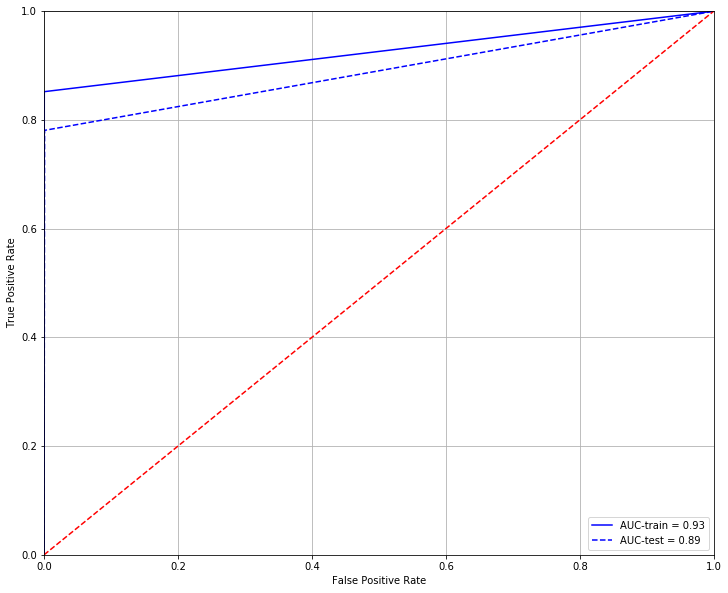

In [16]:
fig, ax = plt.subplots(1, 1)
ax.plot(fp, tp, 'b', label='AUC-train = %0.2f'% roc_auc)
ax.plot(fp1, tp1, 'b--', label='AUC-test = %0.2f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

### Analyte #24

In [17]:
yclass=y.copy()
yclass[yclass!=17]=0
yclass[yclass==17]=1
X_train, X_test, yclass_train, yclass_test = train_test_split(b,yclass,test_size=0.3,random_state=0)
print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)
Y_train = to_categorical(yclass_train, num_classes)
Y_test = to_categorical(yclass_test, num_classes)

Train dimension:
(12600, 50)
Test dimension:
(5400, 50)


In [18]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.1, input_shape=input_shape))
model.add(Dense(300, input_shape=input_shape, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (50,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               15300     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 18000)             1818000   
Total params: 1,863,400
Trainable params: 1,863,400
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy(name="accuracy"), keras.metrics.Precision(name="precision"),keras.metrics.Recall(name="recall")])
baseline_history=model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Train on 10080 samples, validate on 2520 samples
Epoch 1/100
10080/10080 [==============================] - 18s 2ms/step - loss: 1.1102 - accuracy: 1.0000 - precision: 0.9762 - recall: 0.8293 - val_loss: 0.1265 - val_accuracy: 1.0000 - val_precision: 0.9746 - val_recall: 0.9746
Epoch 2/100
10080/10080 [==============================] - 17s 2ms/step - loss: 0.1159 - accuracy: 1.0000 - precision: 0.9765 - recall: 0.9758 - val_loss: 0.1189 - val_accuracy: 1.0000 - val_precision: 0.9746 - val_recall: 0.9746
Epoch 3/100
10080/10080 [==============================] - 17s 2ms/step - loss: 0.0980 - accuracy: 1.0000 - precision: 0.9769 - recall: 0.9766 - val_loss: 0.1084 - val_accuracy: 1.0000 - val_precision: 0.9746 - val_recall: 0.9746
Epoch 4/100
10080/10080 [==============================] - 17s 2ms/step - loss: 0.0801 - accuracy: 1.0000 - precision: 0.9806 - recall: 0.9803 - val_loss: 0.0720 - val_accuracy: 1.0000 - val_precision: 0.9798 - val_recall: 0.9798
Epoch 5/100
10080/10080 [======

10080/10080 [==============================] - 15s 2ms/step - loss: 0.0220 - accuracy: 1.0000 - precision: 0.9929 - recall: 0.9929 - val_loss: 0.0163 - val_accuracy: 1.0000 - val_precision: 0.9964 - val_recall: 0.9964
Epoch 72/100
10080/10080 [==============================] - 15s 2ms/step - loss: 0.0187 - accuracy: 1.0000 - precision: 0.9942 - recall: 0.9942 - val_loss: 0.0177 - val_accuracy: 1.0000 - val_precision: 0.9948 - val_recall: 0.9948
Epoch 73/100
10080/10080 [==============================] - 15s 2ms/step - loss: 0.0217 - accuracy: 1.0000 - precision: 0.9927 - recall: 0.9927 - val_loss: 0.0169 - val_accuracy: 1.0000 - val_precision: 0.9960 - val_recall: 0.9960
Epoch 74/100
10080/10080 [==============================] - 15s 2ms/step - loss: 0.0189 - accuracy: 1.0000 - precision: 0.9937 - recall: 0.9937 - val_loss: 0.0174 - val_accuracy: 1.0000 - val_precision: 0.9960 - val_recall: 0.9960
Epoch 75/100
10080/10080 [==============================] - 16s 2ms/step - loss: 0.0169 -

In [20]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}% -Precision: {test_results[2]}% -Recall: {test_results[3]}%')

5400/5400 [==============================] - 3s 544us/step
Test results - Loss: 0.013717163269994436 - Accuracy: 0.9999997019767761% -Precision: 0.9951851963996887% -Recall: 0.9951851963996887%


In [21]:
#Computing F1-score
train_features = np.array(X_train)
test_features = np.array(X_test)
train_labels=np.array(yclass_train)
test_labels=np.array(yclass_test)
train_predictions_baseline = model.predict_classes(train_features, batch_size=150)
f1_train=sklearn.metrics.f1_score(train_labels, train_predictions_baseline, average=None)
test_predictions_baseline = model.predict_classes(test_features, batch_size=150)
f1_test=sklearn.metrics.f1_score(test_labels, test_predictions_baseline, average=None)
print('f1_scores, training set',f1_train,'f1_scores in testing set',f1_test)

f1_scores, training set [0.99805132 0.91549296] f1_scores in testing set [0.99752852 0.90714286]
